In [1]:
from my import source as my
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 加载鸢尾花数据集
iris = load_iris()

# 直接将数据集转换为DataFrame，并添加列名和类别名称
iris_df = my.pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.100,3.500,1.400,0.200,0
1,4.900,3.000,1.400,0.200,0
2,4.700,3.200,1.300,0.200,0
3,4.600,3.100,1.500,0.200,0
4,5.000,3.600,1.400,0.200,0


In [3]:
viewer = my.ViewDataframe(df=iris_df)
viewer.display_info()


--- 数据维度 ---
维度: 150 行 x 5 列

--- 特征类型 ---
                      数据类型
sepal length (cm)  float64
sepal width (cm)   float64
petal length (cm)  float64
petal width (cm)   float64
species              int32

--- 缺失值信息 ---
                   缺失值统计 缺失值占比 (%)
sepal length (cm)      0     0.00%
sepal width (cm)       0     0.00%
petal length (cm)      0     0.00%
petal width (cm)       0     0.00%
species                0     0.00%

--- 重复值信息 ---
重复行统计        2
重复行占比    1.33%
dtype: object

--- 数据展示(前五行+后五行) ---
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.100             3.500              1.400             0.200   
1                4.900             3.000              1.400             0.200   
2                4.700             3.200              1.300             0.200   
3                4.600             3.100              1.500             0.200   
4                5.000             3.600              1.400             0.200   
1

In [6]:
my.describe_plus(df=iris_df)

,count,mean,std,min,25%,50%,75%,max,Skewness,Kurtosis,Normality Test (p-value)
sepal length (cm),150.000,5.843,0.828,4.300,5.100,5.800,6.400,7.900,0.312,-0.574,0.057
sepal width (cm),150.000,3.057,0.436,2.000,2.800,3.000,3.300,4.400,0.316,0.181,0.210
petal length (cm),150.000,3.758,1.765,1.000,1.600,4.350,5.100,6.900,-0.272,-1.396,0.000
petal width (cm),150.000,1.199,0.762,0.100,0.300,1.300,1.800,2.500,-0.102,-1.336,0.000
species,150.000,1.000,0.819,0.000,0.000,1.000,2.000,2.000,0.000,-1.500,0.000


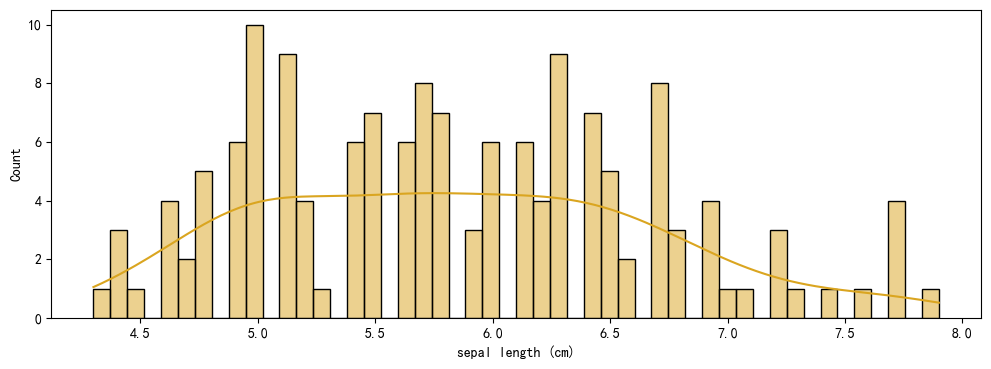

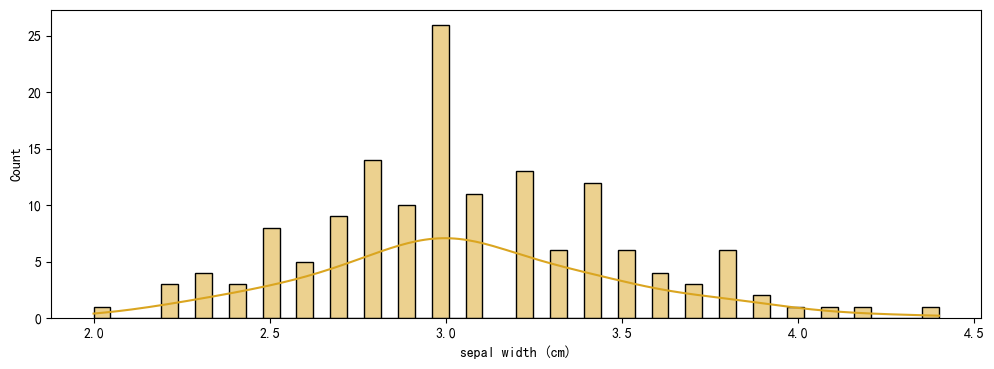

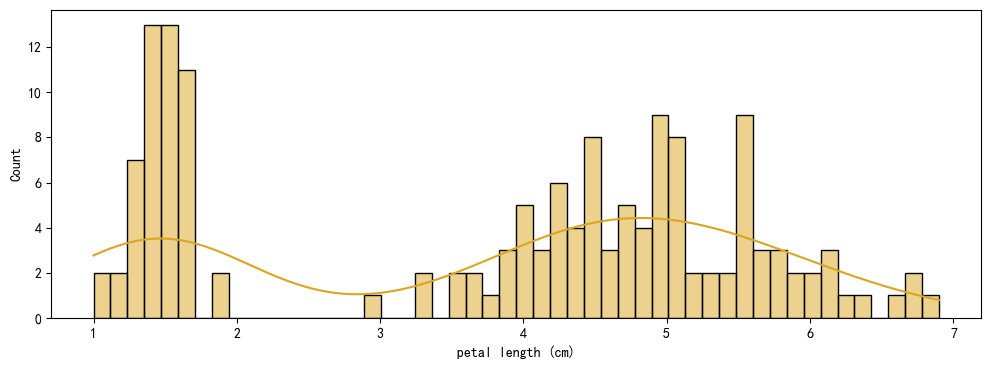

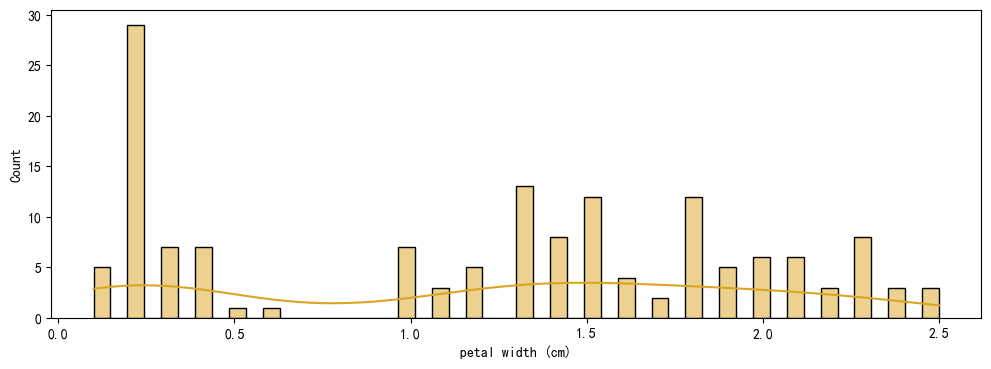

In [3]:
num_var = list(iris_df.iloc[:, :-1].columns)
plot = my.DataVisualization(iris_df, num_var=num_var)
plot.histogram_plot(color='goldenrod', figsize=(12,4))

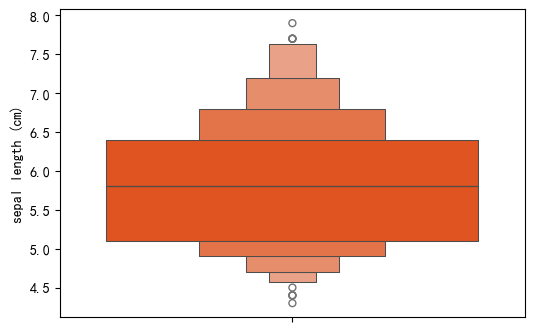

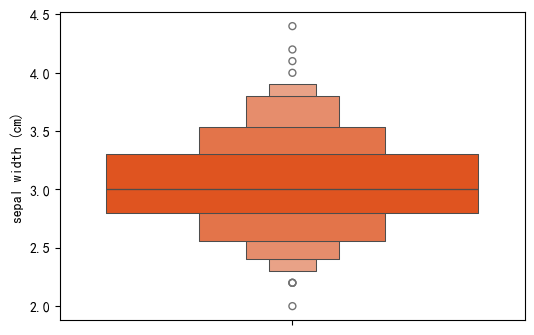

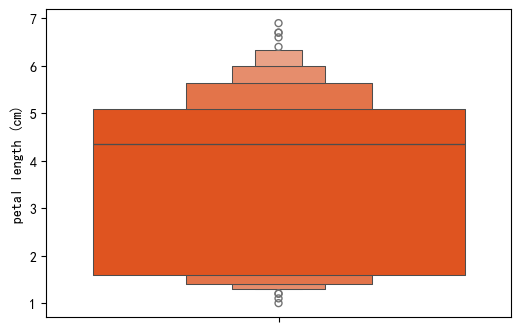

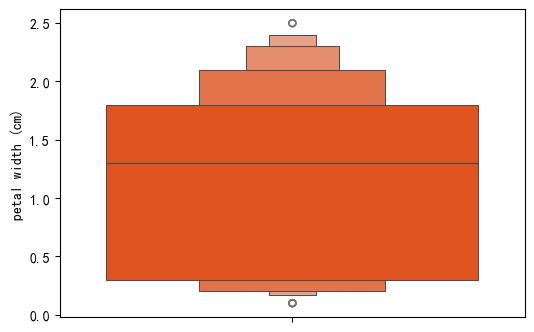

In [10]:
plot.box_plot(color='orangered')

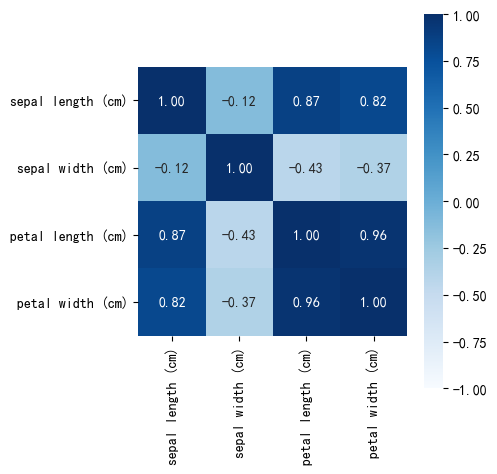

In [8]:
plot.heatmaps(var_list=num_var, cmap='Blues', half=False, figsize=(5,5))

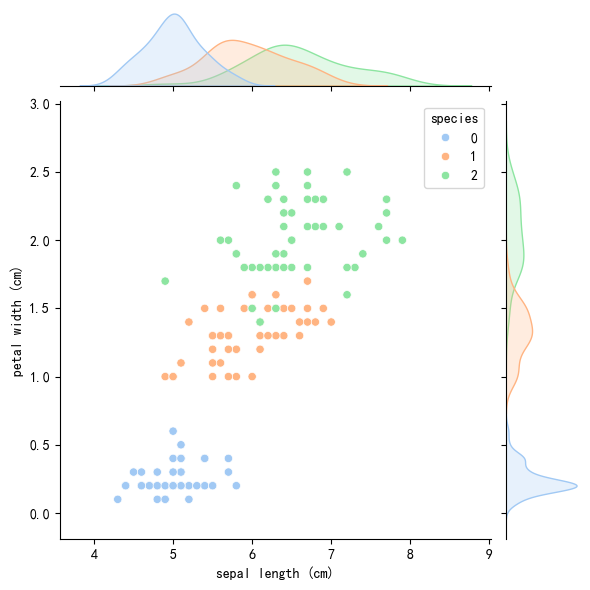

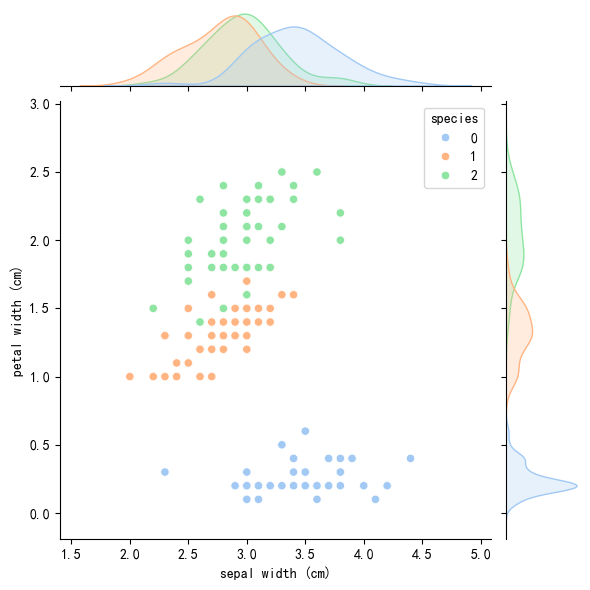

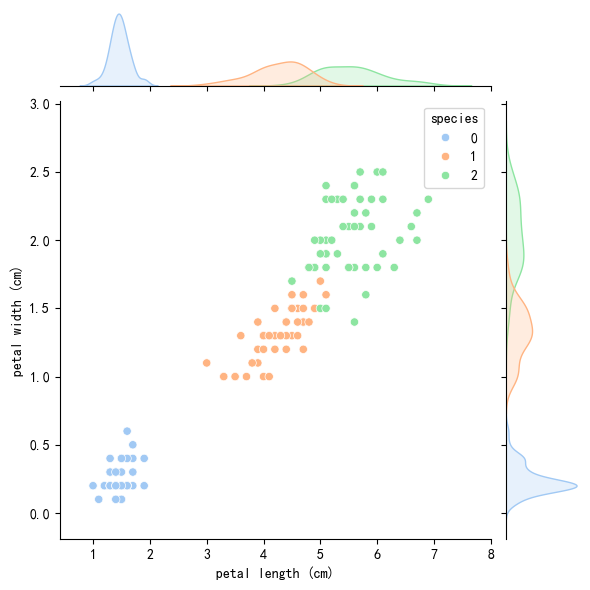

In [5]:
num_var = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']
plot = my.DataVisualization(iris_df, num_var=num_var)
plot.join_plot(dependent_variable='petal width (cm)', hue='species', kind='scatter', palette='pastel')

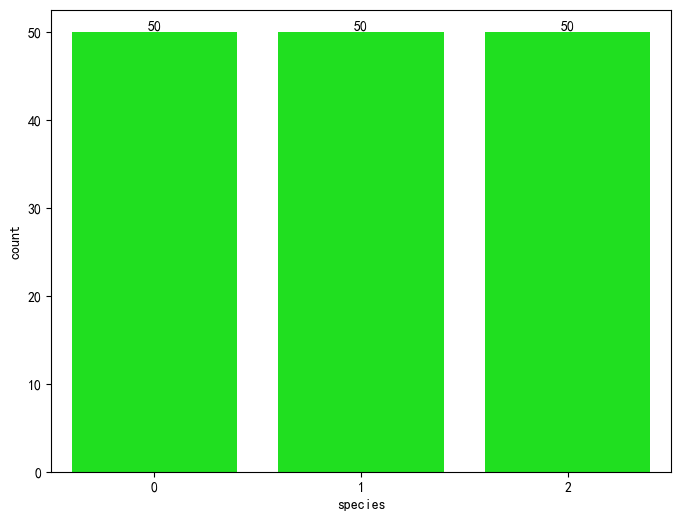

In [4]:
cat_var = ['species']
plot = my.DataVisualization(iris_df, cat_var=cat_var)
plot.count_plot(color='lime')

In [3]:
X = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]
X_trainval, X_test, y_trainval, y_test = my.cut_data(X, y, stratified=True)

In [4]:
base_line = KNeighborsClassifier()
my.train_classification_baseline(base_line, X_trainval, y_trainval, multi_class=True, stratified=True, is_print=True, eval_metrics=[my.accuracy_score, my.precision_score, my.recall_score], probably_params={'average': 'micro'})

运行时间0.16555023193359375秒
模型结果:
        F1_score   AUC  accuracy_score  precision_score  recall_score
train     0.972 0.998           0.972            0.972         0.972
val       0.963 0.997           0.963            0.963         0.963


In [5]:
# 如果你发现这里f1分数,accurayc_score,precision_score,recall_score的分数完全一致，不用担心，这不是你错了，也不是模型错了，而是一种合理现象
# 因为鸢尾花数据集的标签完全均衡，并且分类效果很好，采用micro做十折交叉验证取平均值会得到相等的结果
cv_acc = cross_val_score(KNeighborsClassifier(),X_trainval, y_trainval, cv=10, scoring='accuracy', n_jobs=-1).mean()
cv_f1 = cross_val_score(KNeighborsClassifier(), X_trainval, y_trainval, cv=10, scoring='f1_micro', n_jobs=-1).mean()
cv_ps = cross_val_score(KNeighborsClassifier(), X_trainval, y_trainval, cv=10, scoring='precision_micro', n_jobs=-1).mean()
cv_rs = cross_val_score(KNeighborsClassifier(), X_trainval, y_trainval, cv=10, scoring="recall_micro", n_jobs=-1).mean()
print(cv_acc, cv_f1, cv_ps, cv_rs)

0.9527272727272728 0.9527272727272728 0.9527272727272728 0.9527272727272728


In [6]:
# 当你采用macro时，会发现ps和rs发生一点变化
base_line = KNeighborsClassifier()
my.train_classification_baseline(base_line, X_trainval, y_trainval, multi_class=True, stratified=True, is_print=True, eval_metrics=[my.accuracy_score, my.precision_score, my.recall_score], probably_params={'average': 'macro'})

运行时间0.15819311141967773秒
模型结果:
        F1_score   AUC  accuracy_score  precision_score  recall_score
train     0.972 0.998           0.972            0.973         0.972
val       0.963 0.997           0.963            0.974         0.964


In [6]:
# 当你只需要计算一个指标时，可以不使用probably_params参数
base_line = KNeighborsClassifier()
my.train_classification_baseline(base_line, X_trainval, y_trainval, multi_class=True, stratified=True, is_print=True, eval_metrics=[my.accuracy_score])

运行时间0.12679505348205566秒
模型结果:
        F1_score   AUC  accuracy_score
train     0.972 0.998           0.972
val       0.963 0.997           0.963


In [4]:
params = {'n_neighbors': ['int', 1, 10]}
optuna_frame = my.OptunaForGeneralML(X_trainval, y_trainval, task_type='classification', ml_method='sklearn.neighbors.KNeighborsClassifier', params=params, scoring=my.accuracy_score.__name__)
best_param, best_value = optuna_frame.optimize(n_trials=30, multi_class=True, eval_metrics=[my.accuracy_score])
print(best_param, best_value)

[I 2024-04-28 21:17:59,114] A new study created in memory with name: no-name-39ed2152-d5f4-49a7-9843-75c1f1469ca2
[I 2024-04-28 21:18:00,676] Trial 1 finished with value: 0.9627272727272727 and parameters: {'n_neighbors': 1}. Best is trial 1 with value: 0.9627272727272727.
[I 2024-04-28 21:18:00,722] Trial 7 finished with value: 0.9627272727272727 and parameters: {'n_neighbors': 1}. Best is trial 1 with value: 0.9627272727272727.
[I 2024-04-28 21:18:00,789] Trial 3 finished with value: 0.9536363636363637 and parameters: {'n_neighbors': 2}. Best is trial 1 with value: 0.9627272727272727.
[I 2024-04-28 21:18:01,020] Trial 2 finished with value: 0.9536363636363637 and parameters: {'n_neighbors': 2}. Best is trial 1 with value: 0.9627272727272727.
[I 2024-04-28 21:18:01,195] Trial 4 finished with value: 0.9536363636363637 and parameters: {'n_neighbors': 3}. Best is trial 1 with value: 0.9627272727272727.
[I 2024-04-28 21:18:01,351] Trial 13 finished with value: 0.9436363636363637 and param

运行时间: 4.435856342315674秒
{'n_neighbors': 9} 0.970909090909091


In [5]:
best_model = my.BuildBestModel(X_trainval, y_trainval, X_test, y_test, model_params=best_param, task_type='classification', ml_method='sklearn.neighbors.KNeighborsClassifier', eval_metrics=[my.accuracy_score, my.precision_score, my.recall_score], probably_params={'average': 'micro'})
best_model.train(multi_class=True)

运行时间0.16029143333435059秒
模型结果:
        F1_score   AUC  accuracy_score  precision_score  recall_score
train     0.972 0.998           0.972            0.972         0.972
val       0.971 0.997           0.971            0.971         0.971


In [7]:
effect = best_model.evaluate(multi_class=True)
print(effect)

{'auc': 0.994074074074074, 'f1_score': 0.9555555555555556, 'accuracy_score': 0.9555555555555556, 'precision_score': 0.9555555555555556, 'recall_score': 0.9555555555555556}


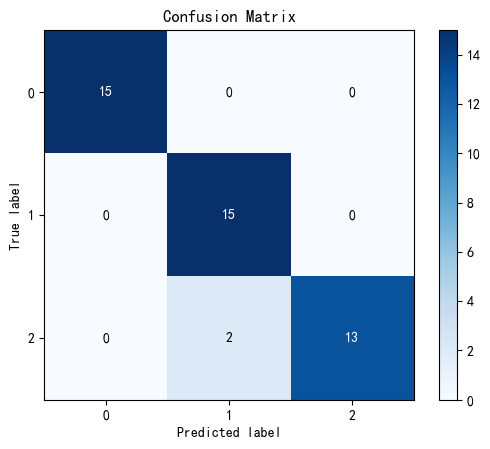

In [33]:
'''
混淆矩阵可以很好的解释为什么上面采用micro计算四个指标会相等。micro是分别计算每个类别的TP,FP,FN，然后汇总后再求值
FP就看竖着的，FN就看横着的
accuracy和average这个参数无关，acc=(15+15+13)/45=0.95
第0类：f1,ps,rs都是1
第1类：ps=15/(15+2)=0.88235,rs=1,f1=2*ps*rs/(ps+rs)
第2类：ps=13/(13+0)=1,rs=13/(13+2)=0.8675,f1=2*rs/(ps+rs)
micro：ps=TP（总）/[TP（总）+FP（总）]=43/(43+2)=0.955,rs=TP（总）/[TP（总）+FN（总）]=43/45=0.995,f1=2*ps*rs/(ps+rs)=0.955
'''
pred_test, pred_test_proba = best_model.get_test_result
plotml = my.PlotForML(y_test, pred_test, pred_test_proba)
plotml.plot_confusion_matrix(cmap='Blues')